# Laboratorio 3
## Inteligencia Artificial
## Seccion 
### Andres de la Roca 20332

In [589]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

# Para explorar la data
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

### Task 1/1.1
Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un np.array para ser trabajado en el notebook.


In [590]:
'''
Se lee el archivo que contiene el dataset y se guarda dentro de un
dataframe asignado a la variable data
'''
data = pd.read_csv('kc_house_data.csv')

In [591]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [592]:
data_array = data.values # Se almacenan los valores dentro de un numpy array

data_array

array([[7129300520, '20141013T000000', 221900.0, ..., -122.257, 1340,
        5650],
       [6414100192, '20141209T000000', 538000.0, ..., -122.319, 1690,
        7639],
       [5631500400, '20150225T000000', 180000.0, ..., -122.233, 2720,
        8062],
       ...,
       [1523300141, '20140623T000000', 402101.0, ..., -122.299, 1020,
        2007],
       [291310100, '20150116T000000', 400000.0, ..., -122.069, 1410,
        1287],
       [1523300157, '20141015T000000', 325000.0, ..., -122.299, 1020,
        1357]], dtype=object)

### Task 1.2
Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona
las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

In [593]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [594]:
# Se toma el valor deseado de todos los arrays anidados de data_array
price = data_array[:, 2]
sqft_living = data_array[:, 5]
training_living, testing_living, training_price, testing_price = train_test_split(sqft_living, price, test_size=0.25, random_state=50)

print(price)
print(sqft_living)

[221900.0 538000.0 180000.0 ... 402101.0 400000.0 325000.0]
[1180 2570 770 ... 1020 1600 1020]


Text(0, 0.5, 'price')

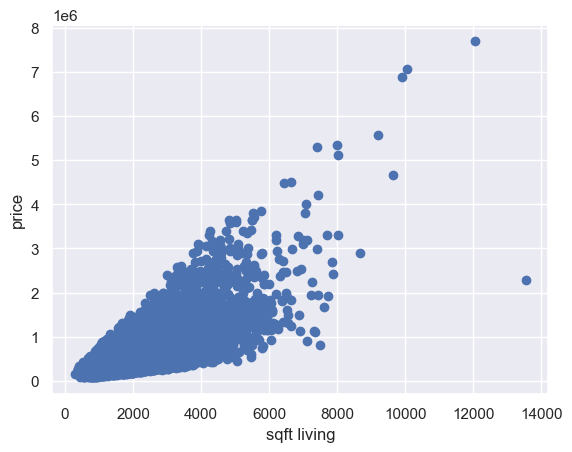

In [595]:
# Visualizacion de los datos en comparativa sqft_living vs price
plt.scatter(x = sqft_living, y = price)
plt.xlabel('sqft living')
plt.ylabel('price')

In [596]:
#Ajuste de arrays 1-D a 2-D para funcionamiento correcto de modelo
sqft_living = sqft_living.reshape(-1, 1)
price = price.reshape(-1, 1)

In [597]:
# Centrar y escalar los datos de sqft_living
mean = np.mean(sqft_living)
std = np.std(sqft_living)
scaled_living = (sqft_living - mean) / std

# Crear matrix de polinomio de segundo grado
ones = np.ones(scaled_living.shape)
poly_living = np.column_stack([ones, scaled_living, scaled_living**2])

# Ajuste de modelo de regresion lineal
regresor = LinearRegression()
regresor.fit(poly_living, price)

# Calcular puntaje R^2
r2 = regresor.score(poly_living, price) 
print(f"Coeficientes: {regresor.coef_} \n Intercepto: {regresor.intercept_} \n R^2: {r2}")


Coeficientes: [[     0.         209844.5658275   32543.08728232]] 
 Intercepto: [507545.05448421] 
 R^2: 0.5327430940591443


### Task 1.3
Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).


In [598]:
from sklearn.preprocessing import StandardScaler

In [599]:
# Se convierten en enteros los contenidos de los arrays para poder trabajar con ellos
sqft_living = sqft_living.astype(int)
price = price.astype(int)

# Normalizacion de sqft_living
scaler = StandardScaler()
sqft_living_norm = np.ones((sqft_living.shape[0], 1))
sqft_living_norm = np.hstack((sqft_living_norm, scaler.fit_transform(sqft_living)))

In [600]:
def gradient_descent(x,y, alpha = 0.01, iters = 1000):
    theta = np.zeros((2,1))
    for i in range(iters):
        hipothesis_result = np.dot(x, theta) # Calculo de hipotesis
        err = hipothesis_result - y
        gradient = x.T.dot(err) / y.size
        theta -= alpha * gradient

        np.append(theta, theta.copy())
    return theta

def normalize_arr(base, target):
    normalized_result = (target - np.mean(base, axis=0)) / np.std(base, axis=0)
    return normalized_result

def standardize_arr(arr):
    result = np.hstack((np.ones((arr.shape[0], 1)), arr))
    return result

In [601]:
# Operaciones para realizar prediccion
theta = gradient_descent(sqft_living_norm, price)

sizes_arr = training_living

price_prediction = np.array([])
for i in sizes_arr:
    sqft_living_predict = np.array([[i]])
    sqft_living_predict = normalize_arr(sqft_living, sqft_living_predict)
    sqft_living_predict = standardize_arr(sqft_living_predict)
    price_predict = np.dot(sqft_living_predict, theta)
    price_prediction = np.append(price_prediction, price_predict[0][0])

print("Sizes to be predicted: ", sizes_arr)
print("Predictions: ", price_prediction)


Sizes to be predicted:  [830 820 1090 ... 1890 4020 1190]
Predictions:  [ 189328.64435378  186522.5298235   262287.62214105 ...  486776.78456343
 1084479.179513    290348.76744385]


### Task 1.4
Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor
balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).


In [602]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [607]:
degrees = range(1, 5) # Grados de polinomios a testear

scores = []

# Se testean los grados de los polinomios del rango degrees
for i in degrees:

    poly_feats = PolynomialFeatures(degree=i)
    poly_sqft_living = poly_feats.fit_transform(sqft_living)
    regresor = LinearRegression()
    mse_scores = -1 * cross_val_score(regresor, poly_sqft_living, price, cv=7, scoring='neg_mean_squared_error').mean()
    scores.append(mse_scores)

# Se selecciona el grado del polinomio que tenga el menor error medio cuadratico
best_degree = degrees[np.argmin(scores)]

print(f"El mejor grado polinomico fue {best_degree}")


[68439201627.56879, 64184380674.25393, 65417195931.146904, 66490818561.806076]
El mejor grado polinomico fue 2 con un puntaje de
